# Regression Analysis Project #2
*Aidana Abdikarim*
<br> 
## Introduction
In this project I used Cancer annual count dataset from https://www.cancer.gov and analyzed how various factors such as average death per year, median income, as well as poverty percent may affect the amount of deaths due to cancer. The dataset contains 65 rows of datapoints and 10 variables: 
<br>
<br> (1) Average death per year;
<br> (2) Median income;
<br> (3) Population for year 2015; 
<br> (4) Poverty percent;
<br> (5) Median age;
<br> (6) Average household size;
<br> (7) Percent of married population;
<br> (8) Percent of unemployed population who is over 16;
<br> (9) Percent of White people in the population;
<br> (10) Birth rate.

<br> **Aims and Questions**
<br> Firstly, I want to construct a multivariate linear model and analyze which predictors are correlated and whether their correlation affects severely our model. Also, I want to test whether all of the 10 variables are significant and necessary using various techniques. After I have a good model, I want to conduct model diagnostics to check for any outliers, abnormalities such as non-homogenuous variance, etc. and perform remedial measures where they're needed.

In [1]:
install.packages("ggplot2") 
library(ggplot2)
install.packages("ggcorrplot")                                       
library(ggcorrplot)
#install.packages("rsq") 
library(rsq)
install.packages("car") 
library(car)
install.packages("leaps")
library(leaps)
install.packages("olsrr")
library(olsrr)
library(lawstat)
library(dplyr)
library(MASS)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: carData
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘olsrr’

The following object is masked from ‘package:datasets’:

    rivers


Attaching package: ‘lawstat’

The following object is masked from ‘package:car’:

    levene.test


Attaching package: ‘dplyr’

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

The following object i

In [2]:
cancer = read.table("cancer_reg233.csv", header = T, sep = ";")

colnames(cancer) = c("count", "death", "income", "population", "poverty", "age", "household", "married",
                   "unemployed", "white", "birthrate")

head(cancer)

count,death,income,population,poverty,age,household,married,unemployed,white,birthrate
102,50,49348,21026,0.146,45.0,2.62,0.542,0.070,0.9092219,0.03729488
427,202,44243,75882,0.171,42.8,2.52,0.527,0.121,0.9174469,0.04603841
57,26,49955,10321,0.125,48.3,2.34,0.578,0.048,0.9410402,0.06796657
428,152,52313,61023,0.156,45.4,2.58,0.504,0.129,0.8488263,0.04964476
250,97,37782,41516,0.232,42.6,2.42,0.541,0.089,0.7510646,0.04204317
146,71,40189,20848,0.178,51.7,2.24,0.527,0.089,0.8940664,0.05889179


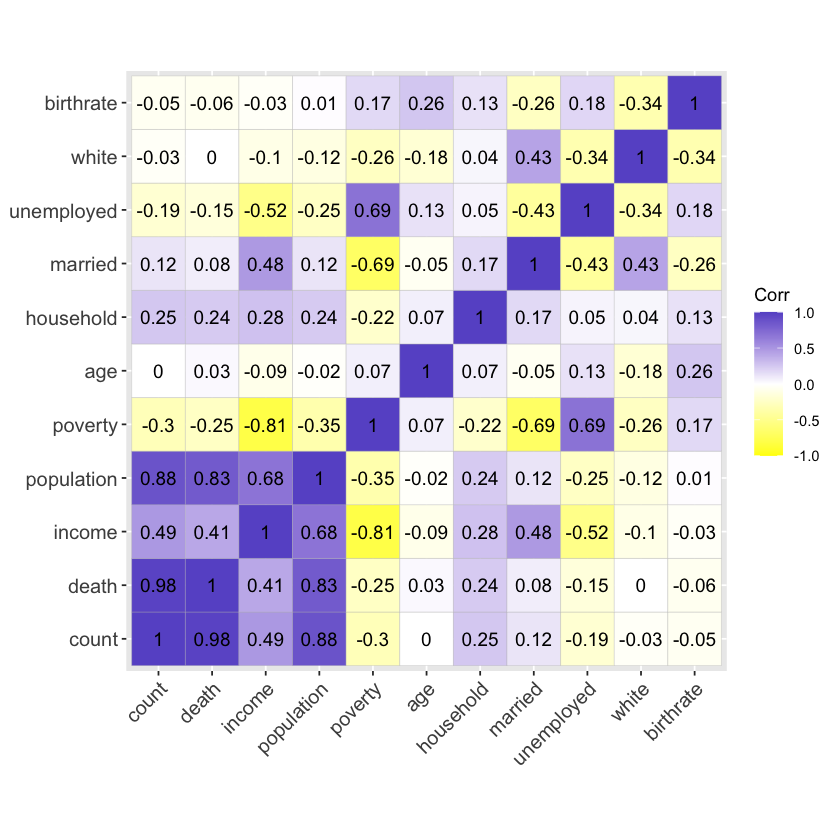

In [3]:
ggcorrplot(round(cor(cancer), 2), method = "square", lab = TRUE, ggtheme = ggplot2::theme_gray, 
           colors = c("yellow", "white", "slateblue3"))

Plotting and interpreting the correlation plot for a dataset that contains $11$ variables would be tedious, therefore, I made a heatmap of correlation matrix that also shows the correlation coefficients of respective pairs of variables. From it we can observe that predictors $death, population, unemployed$ have strong positive correlation, whereas the predictor $poverty, married$ has quite strong negative correlation with $income$. Moreover, I calculated the VIF's of the predictors:

In [4]:
full_model = lm(count ~ death + income + population + poverty + age + household + married +
                unemployed + white + birthrate, data = cancer)

summary(full_model)
vif(full_model)


Call:
lm(formula = count ~ death + income + population + poverty + 
    age + household + married + unemployed + white + birthrate, 
    data = cancer)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.345 -13.968   1.658  11.526  88.796 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.927e+01  9.777e+01   0.606  0.54697    
death        2.291e+00  1.406e-01  16.288  < 2e-16 ***
income      -9.076e-04  8.836e-04  -1.027  0.30903    
population   6.974e-04  2.262e-04   3.083  0.00325 ** 
poverty     -2.233e+02  1.875e+02  -1.191  0.23885    
age         -6.197e-02  4.606e-02  -1.345  0.18424    
household   -3.966e-01  7.390e+00  -0.054  0.95740    
married      1.029e+02  9.103e+01   1.130  0.26343    
unemployed   2.228e+00  1.701e+02   0.013  0.98960    
white       -5.668e+01  3.695e+01  -1.534  0.13105    
birthrate    1.280e+02  2.076e+02   0.617  0.54007    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual s

death     income population    poverty        age  household    married 
  5.514376  14.909611  11.344547  10.835614   1.173165   1.300856   2.381604 
unemployed      white  birthrate 
  2.375054   2.286276   1.282704

# Model Selection

As we saw in the correlation matrix as well as in the values of VIF's, the predictors $income, population, poverty$ are severely correlated, predictos $death, married, unemployed, white$ are moderately correlated, and the rest is not correlated. Constructed model can still provide a good fit and prediction in further, however, from the summary of the full model we can see that some individual predictors are not significant although overall F-test may be highly significant. We reject $H_0: \beta_1 = \beta_2 = ... = \beta_{10} = 0$ strongly - at least one of the betas is significant. Also, interpretability of the model can be lost in the sense that if we keep all other predictors constant and increase the value for poverty, the amount of cancer deaths decreases. 

In [5]:
anova(full_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
death,1,1.732561e+06,1.732561e+06,2.139068e+03,1.597908e-44
income,1,1.673356e+04,1.673356e+04,2.065971e+01,3.214784e-05
population,1,7.002482e+03,7.002482e+03,8.645458e+00,4.850205e-03
poverty,1,6.760326e+02,6.760326e+02,8.346485e-01,3.650693e-01
age,1,5.339885e+02,5.339885e+02,6.592770e-01,4.204472e-01
household,1,1.004466e+01,1.004466e+01,1.240141e-02,9.117503e-01
married,1,2.342342e+02,2.342342e+02,2.891921e-01,5.929898e-01
unemployed,1,1.086021e+02,1.086021e+02,1.340831e-01,7.156932e-01
white,1,2.256735e+03,2.256735e+03,2.786228e+00,1.009751e-01
birthrate,1,3.080509e+02,3.080509e+02,3.803282e-01,5.400678e-01


<br> By looking at the ANOVA table we can conduct ten corresponding hypothesis tests with the sequential sums 
of squares that explain how much variability is absorbed by adding predictors sequentially to a model. From the given p-values we conclude that we reject $H_0: \beta_1 = 0,  \beta_2 = 0, \beta_3 = 0$ in corresponding models $count = \beta_0 + \beta_1 * death + \epsilon_i, ..., count = \beta_0 + \beta_1 * death + \beta_2 * income + \beta_3 * population + \epsilon_i$, respectively. However, we FTR $H_0: \beta_4 = 0, \beta_5 = 0, \beta_6 = 0, \beta_7 = 0, \beta_8 = 0, \beta_9 = 0, \beta_{10} = 0$ in corresponding models at any reasonable significance level. 
<br> I also conducted general linear test for the given null hypothesis: $H_0: \beta_5 = \beta_6 = \beta_7 = \beta_8 = \beta_9 = \beta_{10} = 0$ (in presence of other predictors):

In [6]:
m_reduced = update(full_model, . ~ . - poverty - age - household - married - unemployed - white - birthrate)

anova(full_model, m_reduced)

library(rsq)
rsq.partial(full_model, m_reduced)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
53,42927.92,NA,NA,NA,NA
60,47055.61,-7,-4127.688,0.7280226,0.6489244


$adjustment
[1] FALSE

$variables.full
 [1] "death"      "income"     "population" "poverty"    "age"       
 [6] "household"  "married"    "unemployed" "white"      "birthrate" 

$variables.reduced
[1] "death"      "income"     "population"

$partial.rsq
[1] 0.08771936

From the calculated p-value we conclude that we FTR the null hypothesis at any reasonable significance level. Moreover, I calculated the partial $R^2$ and 8.7% of the remaining variability is explained by adding predictors $poverty, age, household, married, unemployed, white, birthrate$ to a model that already had $3$ other predictors, which is quite small.

In [7]:
new_m = regsubsets(count ~ death + income + population + poverty + age + household + married +
                unemployed + white + birthrate, nbest = 4, data = cancer)
all_output = summary(new_m)
with(all_output, round(cbind(which, rsq, adjr2, cp, bic), 3))

,(Intercept),death,income,population,poverty,age,household,married,unemployed,white,birthrate,rsq,adjr2,cp,bic
1,1,1,0,0,0,0,0,0,0,0,0,0.961,0.960,27.401,-198.893
1,1,0,0,1,0,0,0,0,0,0,0,0.770,0.766,452.539,-85.685
1,1,0,1,0,0,0,0,0,0,0,0,0.241,0.229,1629.900,-9.330
1,1,0,0,0,1,0,0,0,0,0,0,0.092,0.077,1962.252,2.161
2,1,1,0,1,0,0,0,0,0,0,0,0.973,0.972,2.029,-218.777
2,1,1,1,0,0,0,0,0,0,0,0,0.970,0.969,8.742,-211.993
2,1,1,0,0,1,0,0,0,0,0,0,0.965,0.964,20.530,-201.584
2,1,1,0,0,0,0,0,0,1,0,0,0.963,0.962,24.808,-198.189
3,1,1,0,1,1,0,0,0,0,0,0,0.974,0.973,1.278,-217.621
3,1,1,0,1,0,0,0,1,0,0,0,0.974,0.973,1.611,-217.250


From the abovegiven chart we can see that the subset model that contains $death, income, population$, although not with the lowest Mallow's $C_p$ and $BIC$ but still it's the third best subset. Mallow's $C_p$ and $BIC$ of this subset is only about $0.5$ higher than the lowest value. Also the adjusted $R^2$ increased from $0.971$ to $0.973$ for this subset model. So, I deleted the unnecessary predictors and plotted the added variable plots to see if we need to add any extra higher order terms:

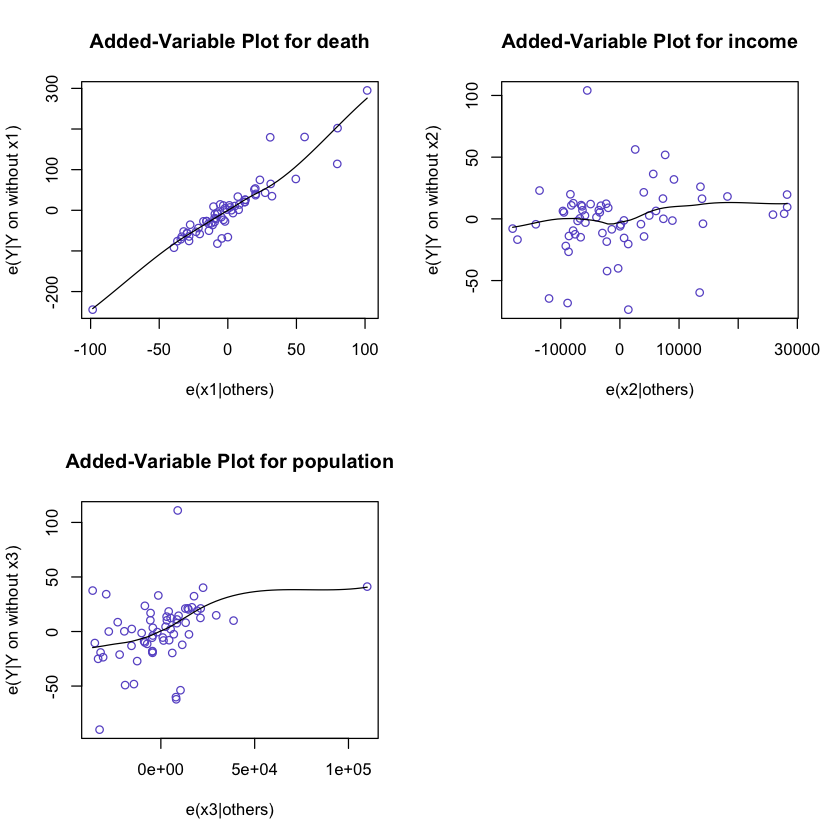

In [8]:
par(mfrow=c(2,2))

f11 = lm(count ~ income + population, data = cancer)
res11=f11$residuals

f12 = lm(death ~ income + population, data = cancer)
res12=f12$residuals

scatter.smooth(x=res12, y=res11, main="Added-Variable Plot for death", col = "slateblue3",
               xlab="e(x1|others)", ylab="e(Y|Y on without x1)") 



f21 = lm(count ~ death + population, data = cancer)
res21=f21$residuals

f22 = lm(income ~ death + population, data = cancer)
res22=f22$residuals

scatter.smooth(x=res22, y=res21, main="Added-Variable Plot for income", col = "slateblue3",
               xlab="e(x2|others)", ylab="e(Y|Y on without x2)") 



f31 = lm(count ~ death + income, data = cancer)
res31=f31$residuals

f32 = lm(population ~ death + income, data = cancer)
res32=f32$residuals

scatter.smooth(x=res32, y=res31, main="Added-Variable Plot for population", col = "slateblue3",
               xlab="e(x3|others)", ylab="e(Y|Y on without x3)")

Added variable plots for first and second predictors show linear pattern, whereas the one for third predictor shows non-linear pattern, particularly an inverse tangent relationship can be seen, therefore, I added extra terms to the model and by applying automated procedure of stepwise regression to pick variables:

In [9]:
new_model = lm(count ~ death + income + population +
            atan(population) + 
            death*income + death*atan(population) + income*atan(population), data = cancer)

ols_step_both_p(new_model)


                                     Stepwise Selection Summary                                      
----------------------------------------------------------------------------------------------------
                                   Added/                   Adj.                                        
Step           Variable           Removed     R-Square    R-Square     C(p)        AIC        RMSE      
----------------------------------------------------------------------------------------------------
   1    death:atan(population)    addition       0.961       0.960    41.0680    636.1734    33.7900    
   2            income            addition       0.970       0.969    19.1790    620.9146    29.7688    
   3       atan(population)       addition       0.973       0.971    13.9380    616.6091    28.5731    
   4          population          addition       0.975       0.973    10.1470    613.0781    27.5956    
   5            death             addition       0.977       0.97

In [10]:
kk = lm(count ~ death*atan(population) + income + atan(population) + population + death, data=cancer)
summary(kk)


Call:
lm(formula = count ~ death * atan(population) + income + atan(population) + 
    population + death, data = cancer)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.713  -9.870   1.853  12.107  93.997 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             4.999e+05  2.063e+05   2.423   0.0185 *
death                  -2.435e+04  9.988e+03  -2.438   0.0179 *
atan(population)       -3.183e+05  1.313e+05  -2.423   0.0185 *
income                  4.753e-04  3.406e-04   1.395   0.1682  
population              2.639e-04  1.694e-04   1.558   0.1247  
death:atan(population)  1.550e+04  6.359e+03   2.438   0.0178 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.51 on 58 degrees of freedom
Multiple R-squared:  0.9774,	Adjusted R-squared:  0.9755 
F-statistic: 501.7 on 5 and 58 DF,  p-value: < 2.2e-16


About new model: It has improved adjusted $R^2$ from $0.9717$ to $0.9755$ and the significance of predictors also improved. Moreover, the added variable plots also improved:

Warning message in model.matrix.default(mt, mf, contrasts):
“отклик появился справа и поэтому был удален”Warning message in model.matrix.default(mt, mf, contrasts):
“проблема с термом 2 в 'model.matrix': не присвоены колонки”Warning message in model.matrix.default(mt, mf, contrasts):
“отклик появился справа и поэтому был удален”Warning message in model.matrix.default(mt, mf, contrasts):
“проблема с термом 1 в 'model.matrix': не присвоены колонки”

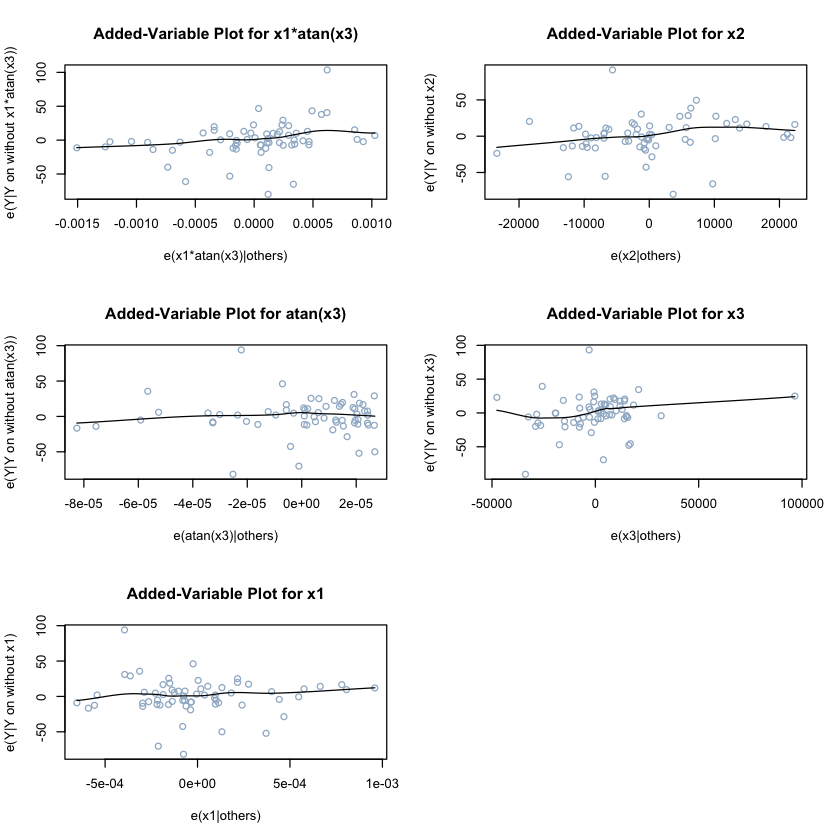

In [11]:
par(mfrow=c(3,2))

#Added var plot for death*atan(population)
f11 = lm(count ~ income + atan(population) + population + death, data=cancer)
res11=f11$residuals

f12 = lm(death*atan(population) ~ income + atan(population) + population + death, data = cancer)
res12=f12$residuals

scatter.smooth(x=res12, y=res11, main="Added-Variable Plot for x1*atan(x3)", col = "slategray3",
               xlab="e(x1*atan(x3)|others)", ylab="e(Y|Y on without x1*atan(x3))") 




#Added var plot for x2
f21 = lm(count ~ death*atan(population) + atan(population) + population + death, data=cancer)
res21=f21$residuals

f22 = lm(income ~ death*atan(population) + atan(population) + population + death, data = cancer)
res22=f22$residuals

scatter.smooth(x=res22, y=res21, main="Added-Variable Plot for x2", col = "slategray3",
               xlab="e(x2|others)", ylab="e(Y|Y on without x2)") 



#Added var plot for atan(population)
f31 = lm(count ~ death*atan(population) + income + population + death, data=cancer)
res31=f31$residuals

f32 = lm(atan(population) ~ death*atan(population) + income + population + death, data = cancer)
res32=f32$residuals

scatter.smooth(x=res32, y=res31, main="Added-Variable Plot for atan(x3)", col = "slategray3",
               xlab="e(atan(x3)|others)", ylab="e(Y|Y on without atan(x3))")



#Added var plot for population
f41 = lm(count ~ death*atan(population) + income + atan(population) + death, data=cancer)
res41=f41$residuals

f42 = lm(population ~ death*atan(population) + income + atan(population) + death, data = cancer)
res42=f42$residuals

scatter.smooth(x=res42, y=res41, main="Added-Variable Plot for x3", col = "slategray3",
               xlab="e(x3|others)", ylab="e(Y|Y on without x3)")



#Added var plot for death
f51 = lm(count ~ death*atan(population) + income + atan(population) + population, data=cancer)
res51=f51$residuals

f52 = lm(death ~ death*atan(population) + income + atan(population) + population, data = cancer)
res52=f52$residuals

scatter.smooth(x=res52, y=res51, main="Added-Variable Plot for x1", col = "slategray3",
               xlab="e(x1|others)", ylab="e(Y|Y on without x1)")

A strong linear relationship shown in the added-variable plot can indicate the fact that this particular variable is important for the model that already contains other variables. From these plots I would suggest that all of them show linear patterns, so all of the given predictors should be included in the model.

# Model Diagnostics

In [12]:
sdr = studres(kk)

t = qt(1-0.05/(2*length(sdr)),      #student t distribution
                 length(sdr)-2-1)

t
                  
any(abs(sdr) > t)

index2=1:length(cancer$count)

for (i in index2) {
    if (abs(sdr[i]) > t) {
        print(sdr[i])
    }
}

[1] 3.536483

[1] TRUE

        2 
-3.722086 
      58 
4.399677 


From the calculated value of studentized deleted residual we can see that datapoints $2$ and $58$ seem to be outlying $Y_i$ observations, because their calculated absolute values are bigger than the $t$ statistic. 

In [13]:
h_ii2 = hatvalues(kk)

avg = mean(h_ii2)*2
avg

index2=1:length(cancer$count)

for (i in index2) {
    if (abs(h_ii2[i]) > avg) {
        print(h_ii2[i])
    }
}
any(abs(h_ii2) > avg)

[1] 0.1875

       9 
0.330683 
       22 
0.2174228 
       23 
0.1888752 
       33 
0.8735292 


[1] TRUE

The represented values are high leverages, i.e. they indicate that $x_i$ is far away from the other predictors ${x_j}_{j̸=i}$ and that $x_i$ may influence the fitted value $\hat{Y}_i$ more than other $x_j$’s will influence their respective fitted values. 

##### DFFITS = dffits(kk)

for (i in index2) {
    if (abs(DFFITS[i]) > 1) {
        print(DFFITS[i])
    }
}

Cooksdist = cooks.distance(kk)
Cooksdist

abs(DFFITS) of observations $2$ and $9$ are larger than $1$, therefore we need to remove these observations. For the case of Cook's distance we need to look for values of Cook’s distance significantly larger than other values; these are cases that have disproportionate influence on the fitted regression surface as a whole. Significantly greater values are: $2, 9, 12, 14, 17, 28, 35, 54, 58, 59$.

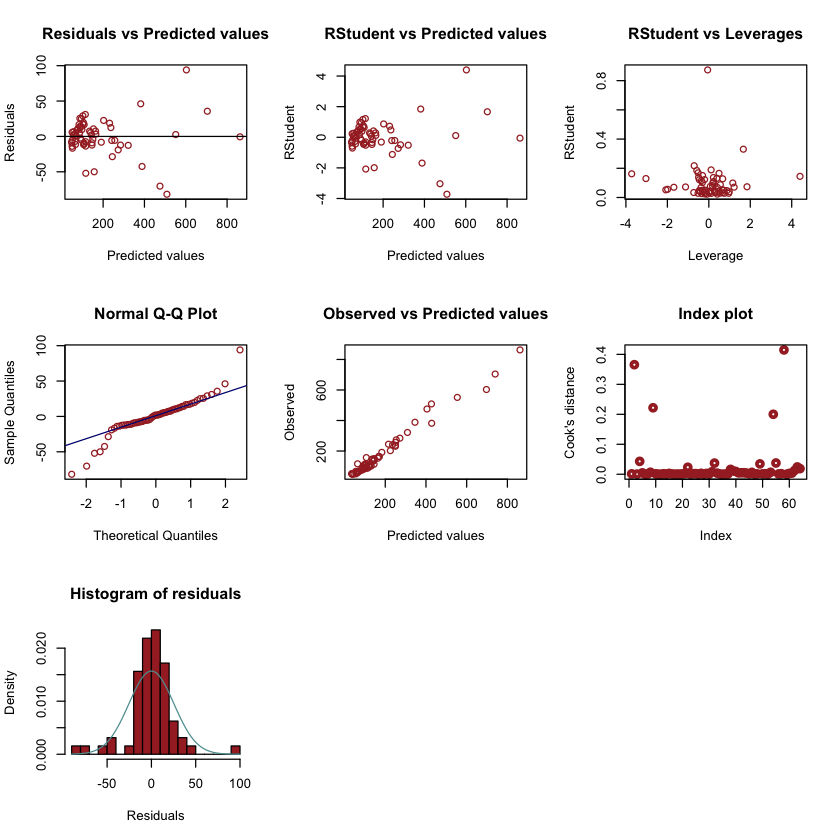

In [15]:
par(mfrow=c(3,3))

residuals = kk$residuals
fitted = kk$fitted.values
indexx=1:length(cancer$count)

plot(fitted, residuals, main="Residuals vs Predicted values", col='brown', xlab = "Predicted values", 
     ylab = "Residuals")
abline(h=0)



plot(fitted, sdr, main="RStudent vs Predicted values", col='brown', xlab = "Predicted values", ylab = "RStudent")



plot(sdr, h_ii2, main="RStudent vs Leverages", col='brown', xlab = "Leverage", ylab = "RStudent")


qqnorm(residuals, col='brown')
qqline(residuals, col="navy")


plot(cancer$count, fitted, main="Observed vs Predicted values", col='brown', xlab = "Predicted values",
     ylab = "Observed")


plot(Cooksdist~indexx, col="brown", lwd=3, xlab="Index", ylab="Cook's distance", main="Index plot")


hist(residuals, xlab='Residuals', main='Histogram of residuals', col='brown', breaks=20, freq=FALSE)
curve(dnorm(x, mean(residuals), sd(residuals)), col="cadetblue", add=TRUE)

In [16]:
new_cancer = cancer[-c(2, 9, 12, 14, 17, 22, 23, 28, 33, 35, 54, 58, 59),]
new_kk = lm(count ~ death*atan(population) + income + atan(population) + population + death, data=new_cancer)

summary(new_kk)


Call:
lm(formula = count ~ death * atan(population) + income + atan(population) + 
    population + death, data = new_cancer)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.342 -10.591  -1.037  11.506  56.010 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             3.307e+05  2.190e+05   1.510   0.1381  
death                  -1.890e+04  1.103e+04  -1.714   0.0935 .
atan(population)       -2.105e+05  1.395e+05  -1.510   0.1381  
income                  6.585e-04  2.670e-04   2.466   0.0175 *
population              2.934e-04  4.817e-04   0.609   0.5456  
death:atan(population)  1.203e+04  7.021e+03   1.714   0.0934 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.87 on 45 degrees of freedom
Multiple R-squared:  0.9496,	Adjusted R-squared:  0.944 
F-statistic: 169.6 on 5 and 45 DF,  p-value: < 2.2e-16


Deleting the outliers from the dataset worsened a bit the model in general, in the sense that adjusted $R^2$ decreased from $0.975$ to $0.944$ and the significance of predictors also became less significant. The coefficients did not change vastly. 

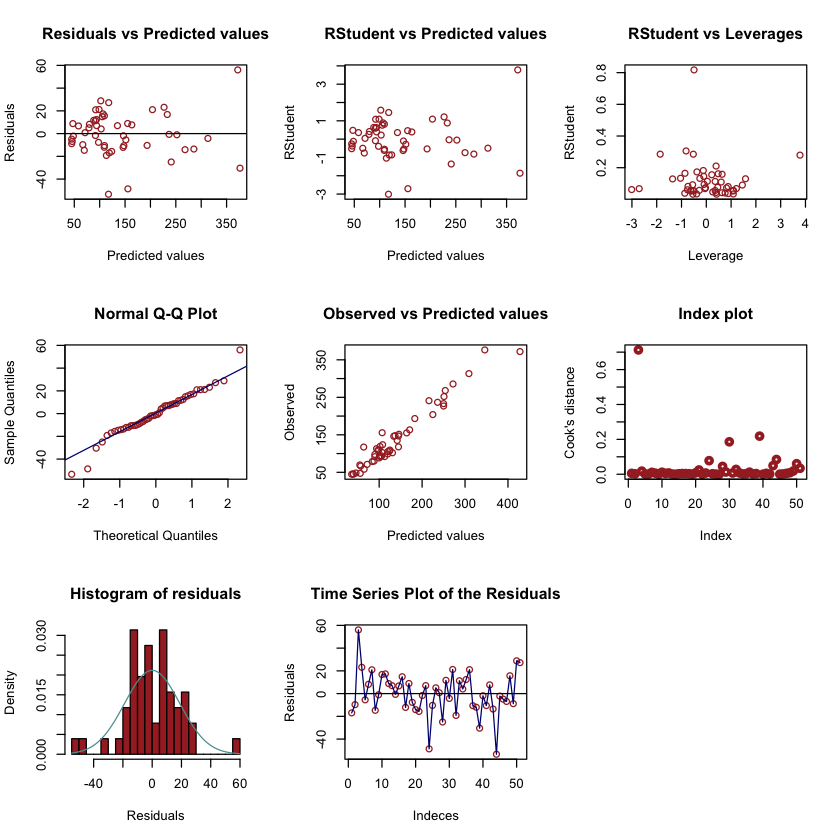

In [17]:
new_sdr = studres(new_kk)


new_h_ii2 = hatvalues(new_kk)


Cooksdists = cooks.distance(new_kk)
indexxs = 1:length(new_cancer$count)


par(mfrow=c(3,3))

residualss = new_kk$residuals
fitteds = new_kk$fitted.values

plot(fitteds, residualss, main="Residuals vs Predicted values", col='brown', xlab = "Predicted values", 
     ylab = "Residuals")
abline(h=0)



plot(fitteds, new_sdr, main="RStudent vs Predicted values", col='brown', xlab = "Predicted values", ylab = "RStudent")



plot(new_sdr, new_h_ii2, main="RStudent vs Leverages", col='brown', xlab = "Leverage", ylab = "RStudent")


qqnorm(residualss, col='brown')
qqline(residualss, col="navy")


plot(new_cancer$count, fitteds, main="Observed vs Predicted values", col='brown', xlab = "Predicted values",
     ylab = "Observed")


plot(Cooksdists~indexxs, col="brown", lwd=3, xlab="Index", ylab="Cook's distance", main="Index plot")


hist(residualss, xlab='Residuals', main='Histogram of residuals', col='brown', breaks=20, freq=FALSE)
curve(dnorm(x, mean(residualss), sd(residualss)), col="cadetblue", add=TRUE)


plot(residualss, main="Time Series Plot of the Residuals", col='brown', xlab = "Indeces", ylab = "Residuals")
lines(residualss, col='navy')
abline(h=0)

## Normality of Errors:
<br> **Graphical method:** The normality of residuals was checked using graphical method Q-Q plot, and it showed a straight line, therefore, residuals are normally distributed. The Histogram of residuals is also provided.

<br> **Shapiro-Wilk test:** $H_o$: $e_1, e_2, ..., e_n$ ~ $N$. According to the p-value calculated below, we FTR the null hypothesis, so indeed they are normally distributed.

In [18]:
shapiro.test(residualss)


	Shapiro-Wilk normality test

data:  residualss
W = 0.96542, p-value = 0.142


## Homogenuity of Variance:
<br> **Graphical method:** The homogenuity of variance and linearity are checked by plotting the residuals $e_i$ versus the fitted values $\hat{y}$. We expect to see a constant spread/distance of the residuals to the $0$ line across all the $\hat{y}_i$ values and we see it in the graph plotted above. 

<br> **Levene's Test:** $H_0$: $\sigma^2_1 = ... = \sigma^2_t$. According to the p-value calculated below, we FTR the null hypothesis, so indeed the variance is homogenuous.

In [19]:
breaks = c(10, 50, 100, 200, 300, 500, 600, 800, 900)
groups = cut(new_cancer$count, breaks)
levene.test(residualss, groups)


	Modified robust Brown-Forsythe Levene-type test based on the absolute
	deviations from the median

data:  residualss
Test Statistic = 1.9405, p-value = 0.1197


## Independence of Residuals:
<br> **Graphical method:** Independence of residuals can be checked by plotting $e_i$ vs. $i$. If there is no discernible pattern in the plot, i.e. one cannot predict $e_i$ from $e_{<i}$. From the plot above we can conclude that the residuals are indeed independent. 

<br> **Runs Test:** $H_o$: $e_i$'s are independent. According to the p-value calculated below, we FTR the null hypothesis, so indeed the residuals are independent.


	Runs Test - Two sided

data:  residualss
Standardized Runs Statistic = -0.70475, p-value = 0.481


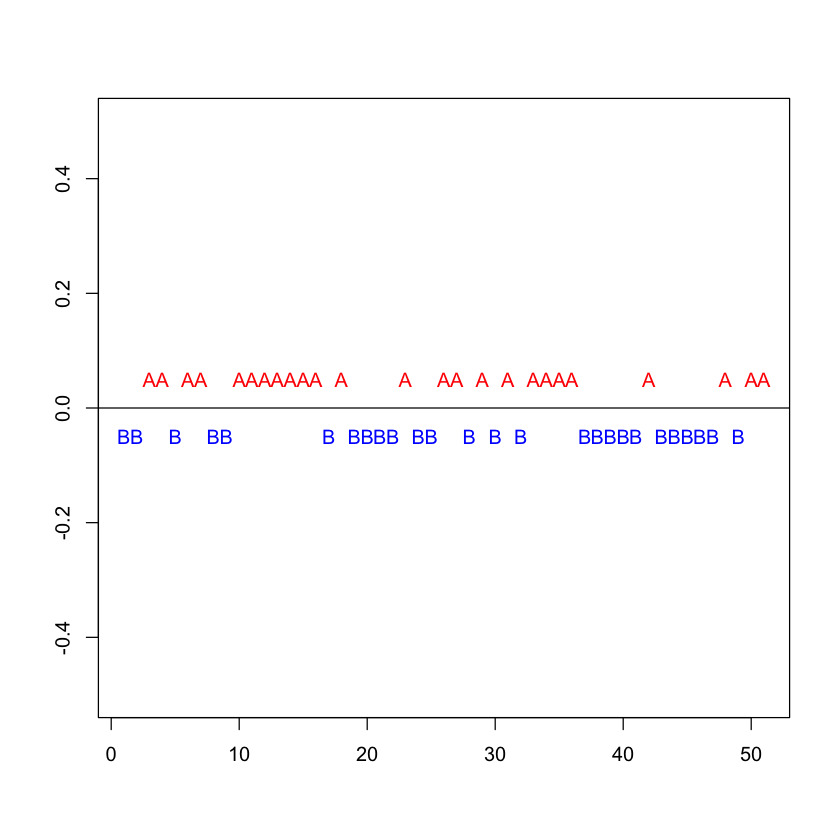

In [20]:
runs.test(residualss, plot.it=TRUE)

## Residual Plots

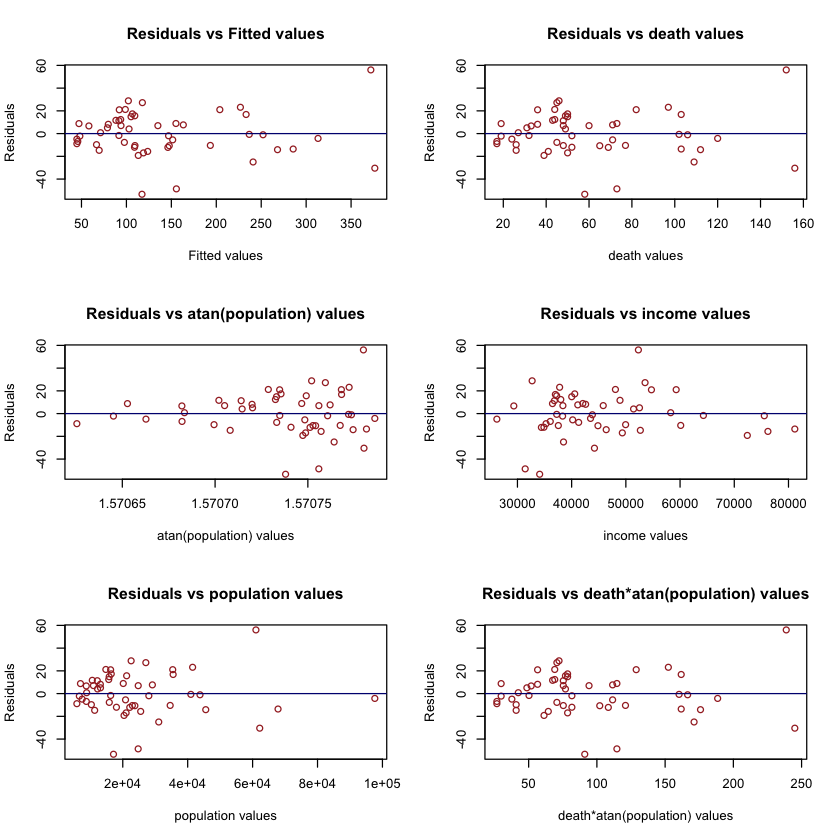

In [21]:
par(mfrow=c(3,2))


plot(residualss ~ fitteds, data = new_cancer, main="Residuals vs Fitted values", col='brown', xlab="Fitted values", ylab="Residuals")
abline(h=0, col='navy')

plot(residualss ~ death, data = new_cancer, main="Residuals vs death values", col='brown', xlab="death values", ylab="Residuals")
abline(h=0, col='navy')

plot(residualss ~ atan(population), data = new_cancer, main="Residuals vs atan(population) values", col='brown', xlab="atan(population) values", ylab="Residuals")
abline(h=0, col='navy')

plot(residualss ~ income, data = new_cancer, main="Residuals vs income values", col='brown', xlab="income values", ylab="Residuals")
abline(h=0, col='navy')

plot(residualss ~ population, data = new_cancer, main="Residuals vs population values", col='brown', xlab="population values", ylab="Residuals")
abline(h=0, col='navy')

vals = new_cancer$death*atan(new_cancer$population)
plot(residualss ~ vals, data = new_cancer, main="Residuals vs death*atan(population) values", col='brown', xlab="death*atan(population) values", ylab="Residuals")
abline(h=0, col='navy')

One remedial measure to fix the uneven plot in third graph (Residuals vs atan(population) values graph) is to apply the Box-Cox log transformation either on x or Y. Below I performed BC transformation on Y and the plot is even now:

bcPower Transformation to Normality 
                   Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
(new_cancer$count)   -0.0012           0       -0.424       0.4215

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                               LRT df    pval
LR test, lambda = (0) 3.263413e-05  1 0.99544

Likelihood ratio test that no transformation is needed
                           LRT df     pval
LR test, lambda = (1) 20.53665  1 5.85e-06

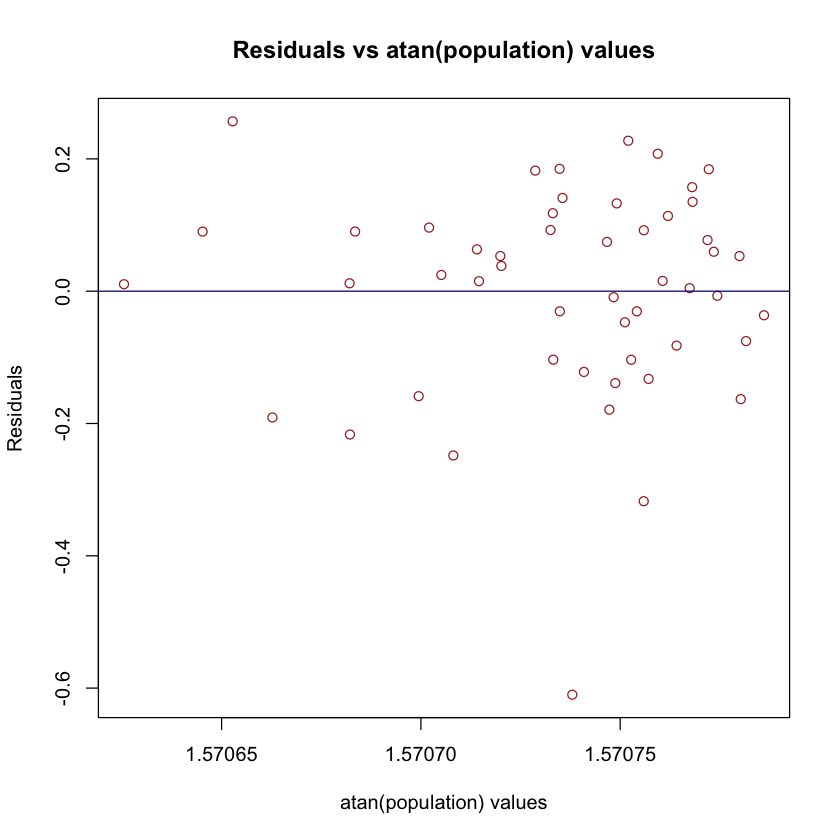

In [22]:
bc = powerTransform((new_cancer$count))
summary(bc)

mod = lm(log(count) ~ death*atan(population) + income + atan(population) + population + death, data=new_cancer)

re=mod$residuals

plot(re ~ atan(new_cancer$population), xlab = "atan(population) values",ylab="Residuals",
     main="Residuals vs atan(population) values", col='brown')
abline(h=0, col='navy')

# Model Validation


In order to test model validation, I calculated $PRESS_p$ and $SSE_p$ values, if $PRESS_p$ ≈ $SSE_p$, then it supports the validity of the model with p predictors. I also calculated the percentage difference of these values and result can be interpreted as statistically valid:

In [23]:
hat = hatvalues(new_kk)
val = (new_kk$residuals/(1-hat))^2
print("PRESS:") 
sum(val)


sse = sum((new_kk$fitted.values - new_cancer$count)^2)
print("SSE:") 
sse

print('Percentage difference:') 
abs(sse-sum(val))*100/sse

[1] "PRESS:"


[1] 24733.3

[1] "SSE:"


[1] 17761.62

[1] "Percentage difference:"


[1] 39.25141

# Conclusion

To conclude, $7$ out of $10$ predictors turned out to be insignificant by various techniques illustrated above and some nonlinearity of the remaining predictors and interaction terms were added after observing the added variable plots and conducting one of the automated methods. Outliers detected using studentized $t$ statistic, Cook's distance were deleted from the dataset, which did not improve the model. So we can conclude that some of them actually strengthened the constructed linear model. Standard diagnostics were conducted and showed good results. Detected noneven pattern in one of the residual plots was fixed using remedial measures. If I started this project again I would probably try to fix the multicollinearity effect from strongly correlated by applying Ridge regression to the model. Although it does not affect the fit of the model, but it would improve the interpretability of the model and make some steps easier.